In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
import pandas as pd
from tabulate import tabulate

In [128]:
np.random.seed(42)

(20,)


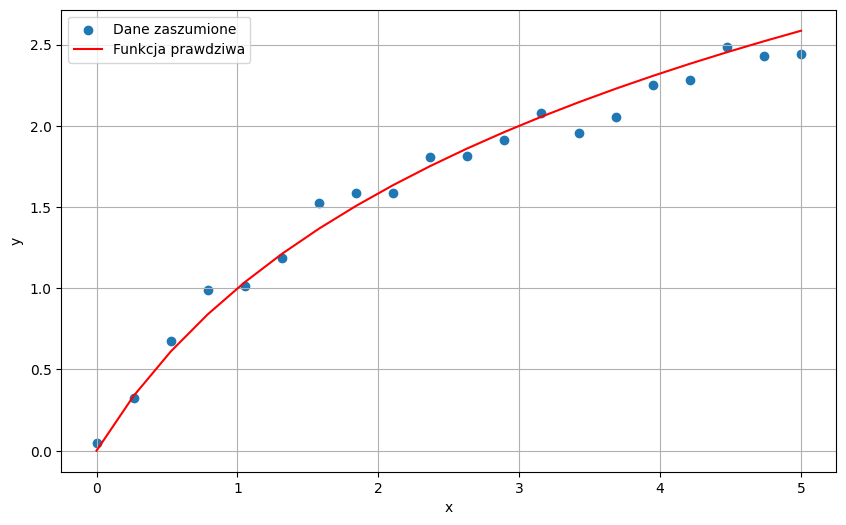

In [129]:
N=20 
x=np.linspace (0,5,N) 
print (x.shape) 
mu=0 
sigma=0.1 
szum=mu+sigma*np.random.randn(N) 
y_bez_zaklocenia = np.log2(x+1) 
y = y_bez_zaklocenia + szum

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane zaszumione')
plt.plot(x, y_bez_zaklocenia, label='Funkcja prawdziwa', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('./fig/przykladowe_dane.png')
plt.show()

In [130]:
a1 = np.polyfit(x, y, 1)
a2 = np.polyfit(x, y, 2)
a3 = np.polyfit(x, y, 3)

y1 = np.polyval(a1, x)
y2 = np.polyval(a2, x)
y3 = np.polyval(a3, x)

mse1 = np.mean((y1 - y_bez_zaklocenia)**2)
mse2 = np.mean((y2 - y_bez_zaklocenia)**2)
mse3 = np.mean((y3 - y_bez_zaklocenia)**2)

print("Wps. wielomianu 1 stopnia:", a1)
print(f"MSE wielomian 1 stopnia: {mse1:6e}")
print()

print("Wps. wielomianu 2 stopnia:", a2)
print(f"MSE wielomian 2 stopnia: {mse2:6e}")
print()

print("Wps. wielomianu 3 stopnia:", a3)
print(f"MSE wielomian 3 stopnia: {mse3:6e}")
print()


Wps. wielomianu 1 stopnia: [0.43729397 0.52924156]
MSE wielomian 1 stopnia: 3.315034e-02

Wps. wielomianu 2 stopnia: [-0.08257891  0.85018853  0.20327217]
MSE wielomian 2 stopnia: 6.288540e-03

Wps. wielomianu 3 stopnia: [ 0.02614751 -0.2786852   1.23244188  0.06474833]
MSE wielomian 3 stopnia: 4.396787e-03



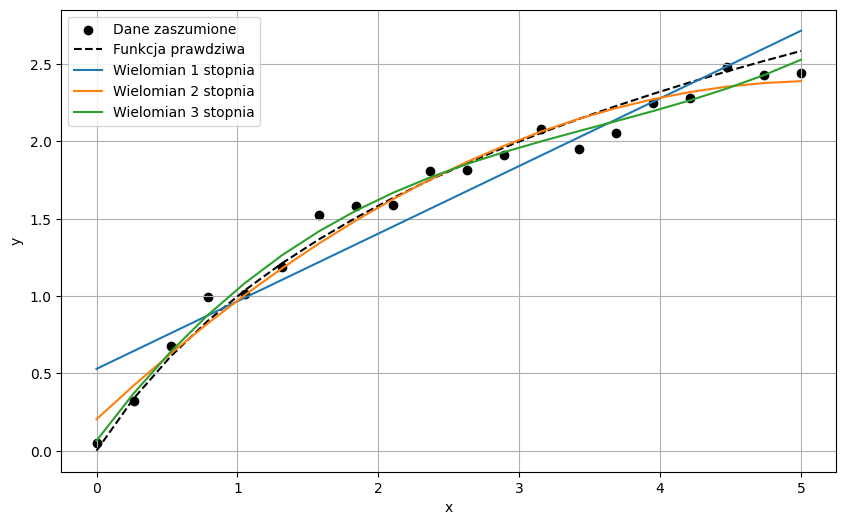

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane zaszumione', color='black')
plt.plot(x, y_bez_zaklocenia, label='Funkcja prawdziwa', color='black', linestyle='dashed')
plt.plot(x, y1, label='Wielomian 1 stopnia')
plt.plot(x, y2, label='Wielomian 2 stopnia')
plt.plot(x, y3, label='Wielomian 3 stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('./fig/wiz_wielm.png')
plt.show()

In [132]:
X3 = np.vstack([np.ones(N), x, x**2, x**3]).T
Y = y.reshape(-1,1)

A = np.linalg.inv(X3.T @ X3) @ (X3.T @ Y)

print("Macierz projektująca X3 (format {}):".format(X3.shape))
print(X3)
print("Wektor obserwacji Y (format {}):".format(Y.shape))
print(Y)
print("Wektor współczynników A (format {}):".format(A.shape))
print(A)

Macierz projektująca X3 (format (20, 4)):
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.63157895e-01 6.92520776e-02 1.82242309e-02]
 [1.00000000e+00 5.26315789e-01 2.77008310e-01 1.45793847e-01]
 [1.00000000e+00 7.89473684e-01 6.23268698e-01 4.92054235e-01]
 [1.00000000e+00 1.05263158e+00 1.10803324e+00 1.16635078e+00]
 [1.00000000e+00 1.31578947e+00 1.73130194e+00 2.27802887e+00]
 [1.00000000e+00 1.57894737e+00 2.49307479e+00 3.93643388e+00]
 [1.00000000e+00 1.84210526e+00 3.39335180e+00 6.25091121e+00]
 [1.00000000e+00 2.10526316e+00 4.43213296e+00 9.33080624e+00]
 [1.00000000e+00 2.36842105e+00 5.60941828e+00 1.32854644e+01]
 [1.00000000e+00 2.63157895e+00 6.92520776e+00 1.82242309e+01]
 [1.00000000e+00 2.89473684e+00 8.37950139e+00 2.42564514e+01]
 [1.00000000e+00 3.15789474e+00 9.97229917e+00 3.14914711e+01]
 [1.00000000e+00 3.42105263e+00 1.17036011e+01 4.00386354e+01]
 [1.00000000e+00 3.68421053e+00 1.35734072e+01 5.00072897e+01]
 [1.00000000e

# ZAD 2

In [ ]:
alphas = [1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1.0, 10.0]

X2 = np.vstack([np.ones(N), x, x**2]).T
X3 = np.vstack([np.ones(N), x, x**2, x**3]).T

def handle_ridge(X, a):
    model = Ridge(alpha=a, fit_intercept=False, solver='auto')
    model.fit(X, Y)
    coef = model.coef_.reshape(-1)
    y_pred = (X @ coef.reshape(-1,1)).reshape(-1)
    mse = np.mean((y_pred - y_bez_zaklocenia)**2)
    return coef, y_pred, mse

def handle_lasso(X, a):
    model = Lasso(alpha=a, fit_intercept=False, max_iter=100000, tol=1e-6)
    model.fit(X, Y)
    coef = model.coef_.reshape(-1)
    y_pred = (X @ coef.reshape(-1,1)).reshape(-1)
    mse = np.mean((y_pred - y_bez_zaklocenia)**2)
    return coef, y_pred, mse

In [ ]:

res_2 = []
res_3 = []
for alpha in alphas:
    coef, y_pred, mse = handle_ridge(X2, alpha)
    res_2.append([alpha, "Ridge", coef, mse, y_pred])
    
    coef, y_pred, mse = handle_ridge(X3, alpha)
    res_3.append([alpha, "Ridge", coef, mse, y_pred])
    
    coef, y_pred, mse = handle_lasso(X2, alpha)
    res_2.append([alpha, "Lasso", coef, mse, y_pred])
    
    coef, y_pred, mse = handle_lasso(X3, alpha)
    res_3.append([alpha, "Lasso", coef, mse, y_pred])
    
df_2 = pd.DataFrame(res_2, columns=["Alpha", "Metoda", "Wspołczynniki", "MSE", "Y_Pred"])
df_3 = pd.DataFrame(res_3, columns=["Alpha", "Metoda", "Wspołczynniki", "MSE", "Y_Pred"])

df_2_tmp = df_2.drop('Y_Pred', axis=1)
df_2_tmp['Wspołczynniki'] = df_2_tmp['Wspołczynniki'].apply(lambda arr: ', '.join([f"{x:.3f}" for x in arr]))
df_2_tmp['MSE'] = df_2_tmp['MSE'].apply(lambda x: f"{x:.6e}")

df_3_tmp = df_3.drop('Y_Pred', axis=1)
df_3_tmp['Wspołczynniki'] = df_3_tmp['Wspołczynniki'].apply(lambda arr: ', '.join([f"{x:.3f}" for x in arr]))
df_3_tmp['MSE'] = df_3_tmp['MSE'].apply(lambda x: f"{x:.6e}")

print("Wyniki dla wielomianu 2 stopnia:")
print(tabulate(df_2_tmp, headers='keys', tablefmt='pretty', showindex=False))
print()
print("Wyniki dla wielomianu 3 stopnia:")
print(tabulate(df_3_tmp, headers='keys', tablefmt='pretty', showindex=False))

Wyniki dla wielomianu 2 stopnia:
+--------+--------+----------------------+--------------+
| Alpha  | Metoda |    Wspołczynniki     |     MSE      |
+--------+--------+----------------------+--------------+
| 1e-08  | Ridge  | 0.203, 0.850, -0.083 | 6.288540e-03 |
| 1e-08  | Lasso  | 0.203, 0.850, -0.083 | 6.288539e-03 |
| 1e-06  | Ridge  | 0.203, 0.850, -0.083 | 6.288541e-03 |
| 1e-06  | Lasso  | 0.203, 0.850, -0.083 | 6.288452e-03 |
| 0.0001 | Ridge  | 0.203, 0.850, -0.083 | 6.288611e-03 |
| 0.0001 | Lasso  | 0.203, 0.850, -0.083 | 6.279709e-03 |
|  0.01  | Ridge  | 0.205, 0.848, -0.082 | 6.296175e-03 |
|  0.01  | Lasso  | 0.196, 0.832, -0.078 | 5.685418e-03 |
|  0.1   | Ridge  | 0.219, 0.830, -0.079 | 6.412345e-03 |
|  0.1   | Lasso  | 0.133, 0.672, -0.034 | 2.705555e-02 |
|  1.0   | Ridge  | 0.299, 0.708, -0.054 | 9.688980e-03 |
|  1.0   | Lasso  | 0.000, 0.000, 0.130  | 5.365789e-01 |
|  10.0  | Ridge  | 0.290, 0.406, 0.020  | 7.340750e-02 |
|  10.0  | Lasso  | 0.000, 0.000, 0.063

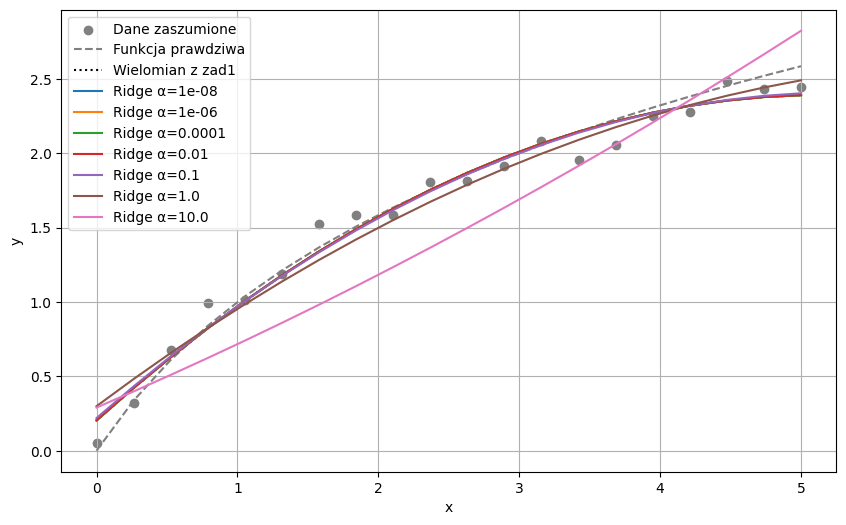

In [135]:
#Ridge / 2
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane zaszumione', color='gray')
plt.plot(x, y_bez_zaklocenia, label='Funkcja prawdziwa', color='gray', linestyle='dashed')
plt.plot(x, y2, label='Wielomian z zad1', linestyle='dotted', color='black')

for index, row in df_2[df_2["Metoda"]=='Ridge'].iterrows():
    plt.plot(x, row['Y_Pred'], label=f'Ridge α={row["Alpha"]}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('./fig/ridge_2.png')
plt.show()

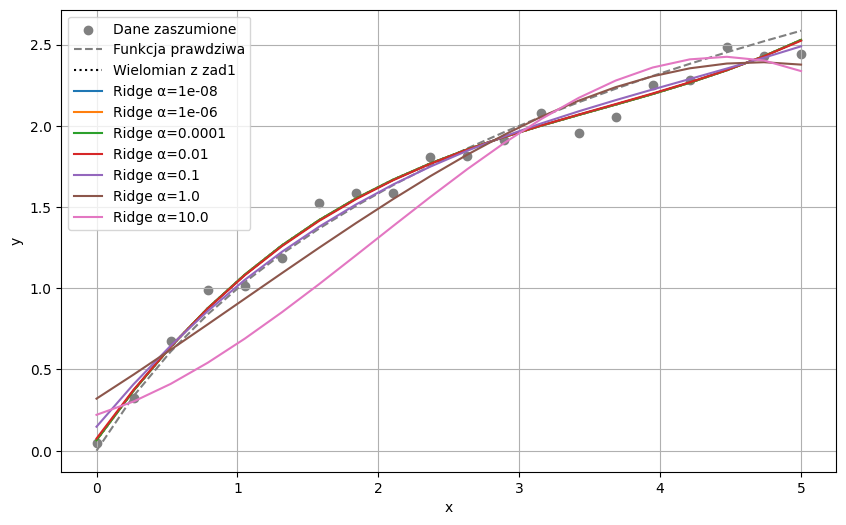

In [136]:
#Ridge / 3
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane zaszumione', color='gray')
plt.plot(x, y_bez_zaklocenia, label='Funkcja prawdziwa', color='gray', linestyle='dashed')
plt.plot(x, y3, label='Wielomian z zad1', linestyle='dotted', color='black')

for index, row in df_3[df_3["Metoda"]=='Ridge'].iterrows():
    plt.plot(x, row['Y_Pred'], label=f'Ridge α={row["Alpha"]}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('./fig/ridge_3.png')
plt.show()

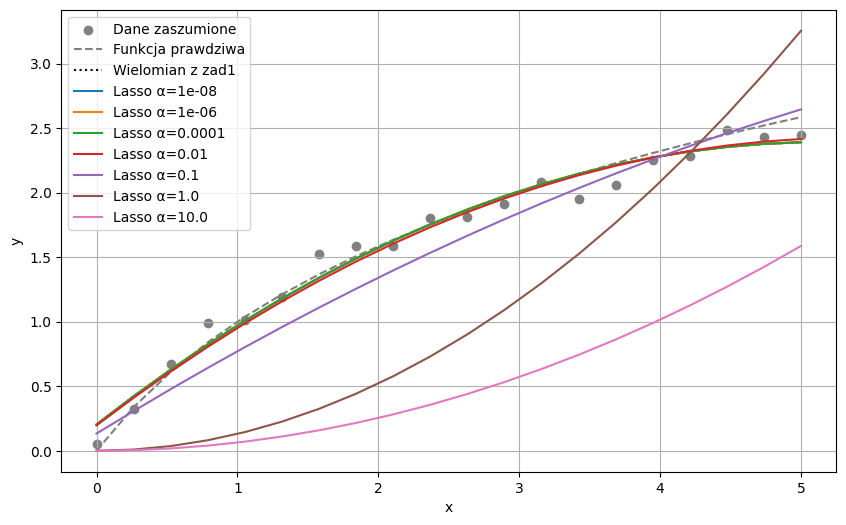

In [137]:
#Lasso / 2
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane zaszumione', color='gray')
plt.plot(x, y_bez_zaklocenia, label='Funkcja prawdziwa', color='gray', linestyle='dashed')
plt.plot(x, y2, label='Wielomian z zad1', linestyle='dotted', color='black')

for index, row in df_2[df_2["Metoda"]=='Lasso'].iterrows():
    plt.plot(x, row['Y_Pred'], label=f'Lasso α={row["Alpha"]}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('./fig/lasso_2.png')
plt.show()

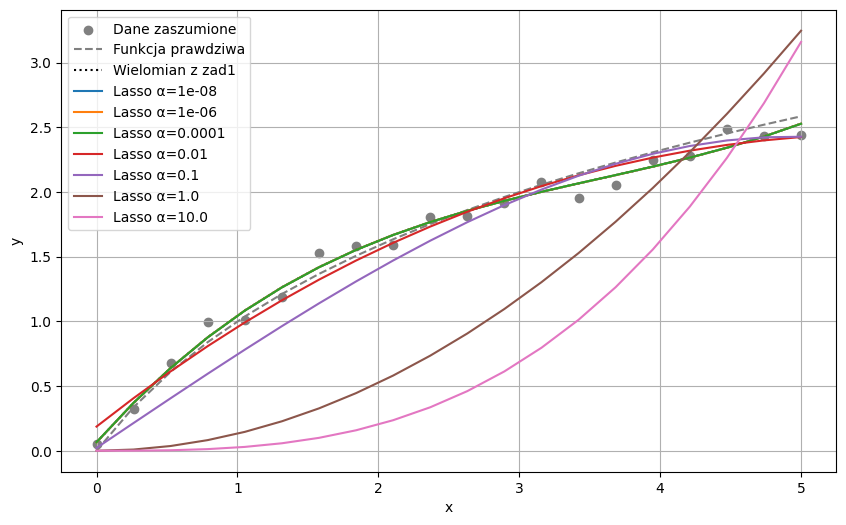

In [138]:
#Lasso / 3
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dane zaszumione', color='gray')
plt.plot(x, y_bez_zaklocenia, label='Funkcja prawdziwa', color='gray', linestyle='dashed')
plt.plot(x, y3, label='Wielomian z zad1', linestyle='dotted', color='black')

for index, row in df_3[df_3["Metoda"]=='Lasso'].iterrows():
    plt.plot(x, row['Y_Pred'], label=f'Lasso α={row["Alpha"]}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('./fig/lasso_3.png')
plt.show()